# Obsah

## Trenovacia / testovacia / validacna vzorka

## Krizova validacia

## Metriky vyhodnocovania

## Hyperparameter tuning

## Overfitting

## Variance / Bias 

# Motivacia pre vyhodnocovanie klasifikatorov

Existuje sptrane vela pristupov a typov klasifikatorov. ** Ktory z nich je najlepsi? **

Rozne klasifikatory maju rozne parametre. ** Ako nastavit klasifikator tak, aby daval najlepsie vysledky? ** 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize'] = 9, 6

# Dataset

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
data = load_breast_cancer()

label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [6]:
label_names

array(['malignant', 'benign'],
      dtype='<U9')

In [7]:
labels[-10:]

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [8]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [9]:
features

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [10]:
df = pd.DataFrame(features)
df.columns = feature_names
df['target'] = labels
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
# %%time
# seaborn.pairplot(df, hue="target")
# plt.savefig('img/breast_cancer_pairplot.png')

## CPU times: user 4min 46s, sys: 3min 59s, total: 8min 46s
## Wall time: 4min 13s

[pairplot](img/breast_cancer_pairplot.png)
![pairplot](img/breast_cancer_pairplot.png)

# Trenovacia / testovacia vzorka

Aby sme dostali prdstavu o tom aky dobry model sme vytvorili, potrebujeme ho otestovat. Testovat by sme mali na inych datach ako sme trenovali. Priamociary sposob na toto je rozdelit nase data na trenovaciu a testovaciu vzorku v nejakom pomere.

In [13]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

Nikdy sa nesmie model trenovat a testovat na tych istych datach. Hrozilo by nam, ze 

In [14]:
# natrenujeme si nejaky klasifikator
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier()
model = cls.fit(train, train_labels)

Teraz uz mame natrenovany model na trenovacich datach. Co sa stane ak skusime predikovat vysledky na trenovacich datach?

In [15]:
cls.score(train, train_labels)

0.99737532808398954

In [16]:
from sklearn.metrics import accuracy_score
train_preds = model.predict(train)
accuracy_score(train_labels, train_preds)

0.99737532808398954

Tento vysledok presnosti klasifikacie je na datach, ktore model pouzival na ucenie. Nehovori nam to nic o tom ako sa bude model spravat v pripade ak mu ukazeme data, ktore nikdy nevidel. Prave kvoli tomu sme si vytvorili testovaciu vzorku. Testovacie data nikdy neboli pouzite na trenovanie a teda uspesnost na tychto datach by nam mala dat realnejsiu predstavu o kvalite modelu.

In [17]:
cls.score(test, test_labels)

0.94680851063829785

In [18]:
preds = model.predict(test)
accuracy_score(test_labels, preds)

0.94680851063829785

Uspesnost na testovacej vzorke je spravidla mensia ako na trenovacej vzorke. Ved ten model nikdy testovacie data nevidel a teda moze vyuzivat len skryte vztahy, ktore sa skutocne naucil. 

Ak je velky rozdiel medzi trenovacou a testovacou chybou, tak by to mohlo znamenat, ze je model pretrenovany. Ze sa naucil data naspamat a nie tie skryte pravidla, ktore su vseobecne a platne aj pre data, ktore nikdy nevidel.

# Krizova validacia

Ked mame malo dat, tak nechceme odstrihnut vyznamnu cast dat na testovanie a nikdy ich nepouzit na trenovanie. Ved to je skoda. Co ked prave v tychto datach bolo nieco, co by tomu modelu vyznamne pomohlo?

POuziva sa preto krizova validacia

In [19]:
from sklearn.model_selection import cross_val_score

cls = RandomForestClassifier()
scores = cross_val_score(cls, features, labels, cv=5)
print(scores)
print(scores.mean())

[ 0.91304348  0.90434783  0.99115044  0.95575221  0.96460177]
0.945779145825


{'boxes': [<matplotlib.lines.Line2D at 0x7fb5ffdc0208>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb5ffe0aeb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb5ffdf6400>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb5ffdfb518>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb660ddbef0>,
  <matplotlib.lines.Line2D at 0x7fb5ffdc0dd8>]}

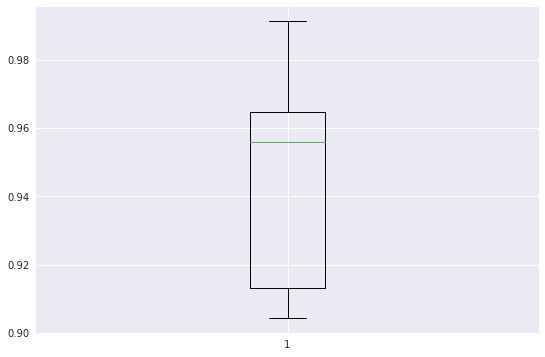

In [20]:
plt.boxplot(scores)

In [21]:
%%time

from sklearn.model_selection import LeaveOneOut

cls = RandomForestClassifier()
scores = cross_val_score(cls, features, labels, cv=LeaveOneOut())
print(scores)
print(scores.mean())

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.  0.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

Pri leave one out sa pouziva maximalne mnozstvo dat na trenovanie a zaroven aj vsetky data na testovanie. Samostatne skore ale nemaju zmysel. Zmysel ma len ich priemer.

## Krizova validacia vytvori *k* modelov, ako vybrat ten, ktory sa pouzije v produkcii na predikciu?

Nijak. Pouzivajte krizovu validaciu na najdenie najlepsieho nastavenia (vyber algoritmov, atributov a hyperparametrov). Ked toto spravite, tak natrenujte uplne novy model na vsetkych datach, ktore mate a pustite to do produkcie.

Pokial nepotrebujete niekomu vopred odhadnut aka asi bude uspesnost na neznamys datach. Vtedy budete potrebovat nejaku testovaciu vzorku, ktoru nepouzijete na trenovanie.

## Existuju aj dalsie sposoby ako rozdelit trenovacie a testovacie data
* Pri inkrementalnom spracovani sa pouziva Test-then-train kde sa najskor pouziju data na overenie chyby modelu a potom sa pouziju na upravenie modelu
* Ak mame zavislosti medzi pozorvaniami (casove, generovanie spolocnym procesom / pouzivatelom), tak je mozne upravit rozdelovanie tak, aby sa nachadzali zavisle pozorovania spolu alebo aby boli rovnomerne rozdelene medzi sady

# Metriky vyhodnocovania

Existuje strasne vela roznych metrik na vyhodnocovanie klasifikacie/regresie/zhlukovania ... Vela z nich je uz predpriprvenych v SciKit kniznici.

http://scikit-learn.org/stable/modules/model_evaluation.html

Dnes sa budeme venovat hlavne klasifikacii, ale vsetky tieto koncepty su aplikovatelne aj pre ine ulohy analyzy dat, len s pouzitim zodpovedajucich metrik na vyhodnocovanie.

## Vela metrik na vyhodnocovanie uspesnosti klasifikatorov sa pocita z matice zamien (confusion matrix)

![confusion matrix](img/confusion_matrix2.png)

Tu je pekny obrazok z wikipedia, kde su zobrazene aj rozne metriky, ktore sa z matice zamien daju spocitat

![classification metrics](img/metrics.png)

Zdroj obrazka: [https://en.wikipedia.org/wiki/Precision_and_recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [57]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier()
model = cls.fit(train, train_labels)
cls.score(test, test_labels) # toto pocita metriku accuracy (spravnost)

0.94680851063829785

In [58]:
preds = model.predict(test)
accuracy_score(test_labels, preds)

0.94680851063829785

![confusion matrix](img/confusion_matrix2.png)

**Accuracy (spravnost)** - kolko pozoorvani ste oznacili spravne
$$accuracy = \frac{TP + TN}{ALL}$$

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, preds)

array([[ 64,   3],
       [  7, 114]])

In [61]:
(64 + 114) / (64 + 3 + 7 + 114)

0.9468085106382979

## Limitacie accuracy

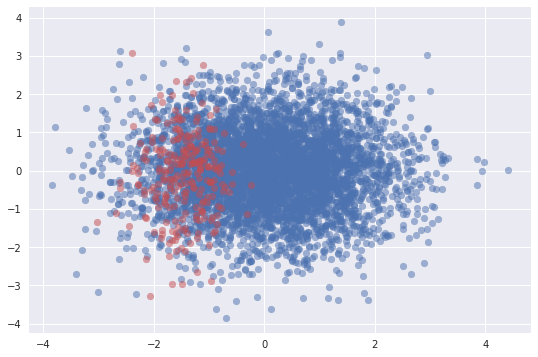

In [62]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA


X, y = make_classification(n_classes=2, class_sep=1, weights=[0.95, 0.05],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=5000, random_state=10)

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

palette = seaborn.color_palette()

plt.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0", alpha=0.5,
            facecolor=palette[0], linewidth=0.15)
plt.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1", alpha=0.5,
            facecolor=palette[2], linewidth=0.15)
plt.scatter(X_vis[y == 2, 0], X_vis[y == 2, 1], label="Class #2", alpha=0.5,
            facecolor=palette[3], linewidth=0.15)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

cls = KNeighborsClassifier(3)
model = cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.95866666666666667

In [29]:
accuracy_score(y_test, np.zeros(len(y_pred)))

0.95199999999999996

**Precision (presnost)** - kolko z tych, co ste oznacili ako pozitivna trieda malo naozaj pozitivnu triedu
$$precision = \frac{TP}{TP + FP}$$

**Recall (pokrytie)** - Kolko zo vsetkych s pozitivnou triedou ste dokazali oznacit ako pozitivna trieda
$$recall = \frac{TP}{TP + FN}$$

In [30]:
from sklearn.metrics import precision_score

print(precision_score(y_test, y_pred))
print(precision_score(y_test, np.zeros(len(y_pred))))

0.75
0.0


In [31]:
from sklearn.metrics import recall_score

print(recall_score(y_test, y_pred))
print(recall_score(y_test, np.zeros(len(y_pred))))

0.208333333333
0.0


In [32]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred))
print(f1_score(y_test, np.zeros(len(y_pred))))

0.326086956522
0.0


## V pripade predikcie do viacerych tried ma zmysel ukazat vysledky pre jednotlive triedy (niektore metriky sa inak ani nedaju spocitat)

![multiclass confusion matrix](img/multi-class-confusionmatrix.png)

$$ precision A = \frac{TP_A}{TP_A+FP_A} $$
$$ = \frac{TP_A}{Total predicted as A} $$
$$ = \frac{TP_A}{TotalPredicted_A} $$
$$ = \frac{30}{60} $$
$$ = 0.5 $$

recall sa pocita obdobne

Ak chcete prezentovat jedno cislo, tak sa pocita priemerna hodnota. To ake vahy sa priradia jednotlivym triedam rozhoduje o vlastnostiach vysledneho cisla (teda pri nevyvazenych datasetoch).
* Na zaklade vah / pocetnosti
* Macro
* Micro

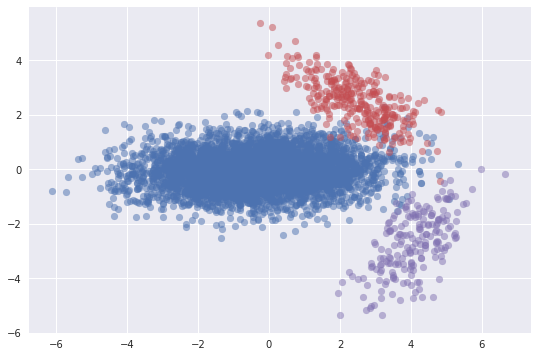

In [33]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA


X, y = make_classification(n_classes=3, class_sep=2, weights=[0.9, 0.06, 0.04],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=5000, random_state=10)

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

palette = seaborn.color_palette()

plt.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0", alpha=0.5,
            facecolor=palette[0], linewidth=0.15)
plt.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1", alpha=0.5,
            facecolor=palette[2], linewidth=0.15)
plt.scatter(X_vis[y == 2, 0], X_vis[y == 2, 1], label="Class #2", alpha=0.5,
            facecolor=palette[3], linewidth=0.15)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

cls = KNeighborsClassifier(3)
model = cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.996

In [36]:
confusion_matrix(y_test, y_pred) 

array([[1328,    0,    1],
       [   2,   97,    0],
       [   3,    0,   69]])

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

             precision    recall  f1-score   support

          0    0.99625   0.99925   0.99775      1329
          1    1.00000   0.97980   0.98980        99
          2    0.98571   0.95833   0.97183        72

avg / total    0.99599   0.99600   0.99598      1500



In [38]:
print(precision_score(y_test, y_pred, average='weighted')) # pouziva sa vaha rovna poctu pozoorvani per trieda
print(precision_score(y_test, y_pred, average='micro')) # pouziva sa globalny pocet TP, FN a FP
print(precision_score(y_test, y_pred, average='macro')) # spocita presnost pre kazdu triedu zvlast a spocita ich nevazeny priemer

0.995990954882
0.996
0.99398778266


Ak mame nevyvazeny dataset a zaujimaju nas aj triedy, ktore su malo pocetne, tak macro priemerovanie je velmi uzitocne

Obdobny sposob vypoctu je aj pre dalsie metriky ako naporiklad Recall alebo F1

## Dalsie metriky

Roznych metrik existuje velmi vela a v roznych domenach sa pouzivaju rozne. Nemame teraz priestor si ich prechadzat, takze len zoznam zopar z nich:
* Accuracy, Precission, Recall, F1
* Sensitivity, Specificity a dalsie, ktore vypocitate z confusion matrix (matica zamien)
* Logloss
* ROC
* AUC
* Precission-recall curve

# Hyperparameter tuning

Rozne klasifikatory maju rozne parametre, ktore mozeme nastavovat a tak zlepsovat ich uspesnost na konkretnom datasete. Tieto sa volaju Hyperparametre.

Mozeme ich skusat nastavovat manualne, intuitivne, alebo mozeme na to ist hrubou silou. 

## GridSearch - prehladavanie mriezky moznych parametrov

In [39]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
n_samples, n_features = X.shape

# Trosku zasumime tie data, aby to vyzeralo krajsie
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier

cv_params = {'max_depth': [1,2,3,4] + list(range(5,10,2)), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 3] }
ind_params = {'random_state': 0}
optimization = GridSearchCV(clf(**ind_params), 
                            cv_params, 
                             scoring = 'f1_macro', cv = 5, n_jobs = -1, verbose=True) 

In [41]:
iris.data.shape # to znamena, ze hlbka stromu 4 by mala stacit. Uvidime co to spravi

(150, 4)

In [42]:
X.shape # uvidime, aky vplyv na vykon podla hlbky stromu bude mat ten sum 

(150, 804)

In [43]:
# Niez to spustime, tak si skusme najskor pozriet, ake vsetky kombinacie to bude skusat
from sklearn.grid_search import ParameterGrid
list(ParameterGrid(cv_params))

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3},
 {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1},
 {'criterion': 'entropy', 'max_depth': 1, 'min_sampl

In [44]:
%%time
optimization.fit(X, y)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
CPU times: user 340 ms, sys: 272 ms, total: 612 ms
Wall time: 1.55 s


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 3], 'max_depth': [1, 2, 3, 4, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_macro', verbose=True)

In [45]:
optimization.grid_scores_

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.55556, std: 0.00000, params: {'criterion': 'gini', 'min_samples_leaf': 1, 'max_depth': 1},
 mean: 0.55556, std: 0.00000, params: {'criterion': 'gini', 'min_samples_leaf': 3, 'max_depth': 1},
 mean: 0.93327, std: 0.04716, params: {'criterion': 'gini', 'min_samples_leaf': 1, 'max_depth': 2},
 mean: 0.93327, std: 0.04716, params: {'criterion': 'gini', 'min_samples_leaf': 3, 'max_depth': 2},
 mean: 0.90537, std: 0.07619, params: {'criterion': 'gini', 'min_samples_leaf': 1, 'max_depth': 3},
 mean: 0.91145, std: 0.06483, params: {'criterion': 'gini', 'min_samples_leaf': 3, 'max_depth': 3},
 mean: 0.89286, std: 0.07450, params: {'criterion': 'gini', 'min_samples_leaf': 1, 'max_depth': 4},
 mean: 0.90466, std: 0.06032, params: {'criterion': 'gini', 'min_samples_leaf': 3, 'max_depth': 4},
 mean: 0.89286, std: 0.07450, params: {'criterion': 'gini', 'min_samples_leaf': 1, 'max_depth': 5},
 mean: 0.90466, std: 0.06032, params: {'criterion': 'gini', 'min_samples_leaf': 3, 'max_depth': 5},


In [46]:
sorted(optimization.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.93327, std: 0.04716, params: {'criterion': 'gini', 'min_samples_leaf': 1, 'max_depth': 2},
 mean: 0.93327, std: 0.04716, params: {'criterion': 'gini', 'min_samples_leaf': 3, 'max_depth': 2},
 mean: 0.93327, std: 0.04716, params: {'criterion': 'entropy', 'min_samples_leaf': 1, 'max_depth': 2},
 mean: 0.93327, std: 0.04716, params: {'criterion': 'entropy', 'min_samples_leaf': 3, 'max_depth': 2},
 mean: 0.91145, std: 0.06483, params: {'criterion': 'gini', 'min_samples_leaf': 3, 'max_depth': 3},
 mean: 0.91138, std: 0.06126, params: {'criterion': 'entropy', 'min_samples_leaf': 3, 'max_depth': 4},
 mean: 0.91138, std: 0.06126, params: {'criterion': 'entropy', 'min_samples_leaf': 3, 'max_depth': 5},
 mean: 0.91138, std: 0.06126, params: {'criterion': 'entropy', 'min_samples_leaf': 3, 'max_depth': 7},
 mean: 0.91138, std: 0.06126, params: {'criterion': 'entropy', 'min_samples_leaf': 3, 'max_depth': 9},
 mean: 0.90647, std: 0.07443, params: {'criterion': 'entropy', 'min_samples_leaf':

In [47]:
list(filter(lambda x: 'best' in x, dir(optimization)))

['best_estimator_', 'best_index_', 'best_params_', 'best_score_']

In [48]:
optimization.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# Velky pozor na pretrenovanie.

# Prehladavanim (manualnym alebo automatickym) priestoru parametrov pridavam dalsi stupen trenovania. Mal by som mat dalsiu testovaciu vzorku, na ktorej ukazem ocakavanu uspesnost.
Tym, ze hladam najlepsiu uspesnost na testovacej vzorke pridavam dalsiu uroven trenovania a hrozi mi problem optimalizacie na testovacie data (vid. leaderboard optimization). Ak ma zaujima ocakavana uspesnost na datach, ktore model nikdy nevidel, tak by som mal mat este jednu (validacnu) vzorku, na ktorej overim len ten uplne posledny model. Uspesnost na tejto vzorke bude uspesnost, ktoru budem moct ocakavat v produkcii, na datach, ktore model nikdy nevidel.

# Variance / Bias 

![bias-variance](img/bias-variance2.jpg)

* **Bias** je chyba spôsobená aproximáciou zložitého problému jednoduchším modelom - nieco nam v tom modely chyba

* **Variancia** nám hovorí, ako velmi by sa zmenil model, ak by sme použili inú trénovaciu sadu

## Pekne sa to vizualizuje na regresii

![overfit](img/overfit.png)

* Ak máme velmi velky bias, tak to znamena, ze mame nedotrenovany model (underfitting) a nieco nam v nom chyba
* Ak mame velku varianciu, tak to indikuje, ze sme model pretrenovali (overfitting)

## Celkova chyba je zlozena z variancie a biasu

Tieto dve chyby nevieme od seba oddelit, ale snazime sa najst bod, kde su v minime

![bias-variance](img/bias-variance.png)

## Snazime sa najst taku zlozitost modelu, aby som mal co najmensiu chybu na datach, ktore model nikdy nevidel

![validation error](img/validation-error.png)


zdroj obrazkov:
* [http://puremonkey2010.blogspot.sk/2016/09/ml-bias-variance-and-overfitting.html](http://puremonkey2010.blogspot.sk/2016/09/ml-bias-variance-and-overfitting.html),
* [https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted](https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted) a 
* [http://scott.fortmann-roe.com/docs/BiasVariance.html](http://scott.fortmann-roe.com/docs/BiasVariance.html)

# Existuju aj dalsie sposoby ako kontrolovat varianciu a bias

## Ucenie suborom metod
* **Bagging** sa pouziva na znizenie variancie
* **Boosting** sa pouziva na znizenie biasu

## Zjednodusenie modelu
* Vyber atributov
* Regularizacia
* Orezavanie stromov